# Importing Dataset

In [11]:
import pandas as pd

file_path = r"C:\Users\Hp\Downloads\Fiver\Loan-Approval-Prediction.csv"  # Ensure file extension is correct
df = pd.read_csv(file_path)




# Data Preprocessing


In [12]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0 

## Filling Missing Values

In [13]:

print(df.isnull().sum())

categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


## Formatting the data

In [14]:

# Convert Dependents to numeric 
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Convert Credit_History to categorical
df['Credit_History'] = df['Credit_History'].astype('category')

# Convert Loan_Status to binary
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


## Removing Outliers using IQR method

In [15]:
import numpy as np

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    remove_outliers(df, col)


## one hot encoding

In [16]:
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed'], drop_first=True)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=False)


In [17]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Loan_ID                  614 non-null    object  
 1   Dependents               614 non-null    float64 
 2   ApplicantIncome          614 non-null    float64 
 3   CoapplicantIncome        614 non-null    float64 
 4   LoanAmount               614 non-null    float64 
 5   Loan_Amount_Term         614 non-null    float64 
 6   Credit_History           614 non-null    category
 7   Loan_Status              614 non-null    int64   
 8   Gender_Male              614 non-null    bool    
 9   Married_Yes              614 non-null    bool    
 10  Education_Not Graduate   614 non-null    bool    
 11  Self_Employed_Yes        614 non-null    bool    
 12  Property_Area_Rural      614 non-null    bool    
 13  Property_Area_Semiurban  614 non-null    bool    
 14  Property_A

In [18]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849.0,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,True
1,LP001003,1.0,4583.0,1508.0,128.0,360.0,1.0,0,True,True,False,False,True,False,False
2,LP001005,0.0,3000.0,0.0,66.0,360.0,1.0,1,True,True,False,True,False,False,True
3,LP001006,0.0,2583.0,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,False,True
4,LP001008,0.0,6000.0,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,True


## Dropping unnecessary Colums

In [20]:
df.drop(columns=['Loan_ID'], inplace=True)


In [77]:
df.drop(columns=['Dependents','ApplicantIncome','CoapplicantIncome'], inplace=True)

In [115]:
df.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,128.0,360.0,1.0,1,True,False,False,False,False,False,True
1,128.0,360.0,1.0,0,True,True,False,False,True,False,False
2,66.0,360.0,1.0,1,True,True,False,True,False,False,True
3,120.0,360.0,1.0,1,True,True,True,False,False,False,True
4,141.0,360.0,1.0,1,True,False,False,False,False,False,True


# EDA

## Box Plot

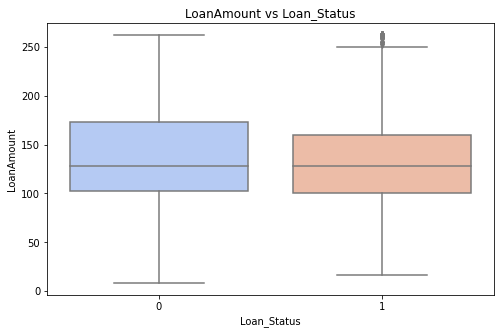

             count        mean        std   min     25%    50%    75%    max
Loan_Status                                                                 
0            192.0  141.270833  58.105605   9.0  102.75  128.0  173.0  261.5
1            422.0  135.588863  54.666988  17.0  100.00  128.0  160.0  261.5


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_box_with_stats(df, x_col, y_col, palette="coolwarm"):
    """
    Creates a box plot and returns statistical summary of numerical values.
    
    Parameters:
    df (DataFrame): The dataset
    x_col (str): The categorical column for x-axis
    y_col (str): The numerical column for y-axis
    palette (str): Color palette for the plot
    
    Returns:
    DataFrame: Descriptive statistics for y_col grouped by x_col
    """
    
    # Create the boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x_col, y=y_col, data=df, palette=palette)
    plt.title(f"{y_col} vs {x_col}")
    plt.show()
    
    # Compute numerical summary
    stats = df.groupby(x_col)[y_col].describe()
    
    return stats

# Example Usage
summary_stats = plot_box_with_stats(df, "Loan_Status", "LoanAmount")
print(summary_stats)


## Bar charts 

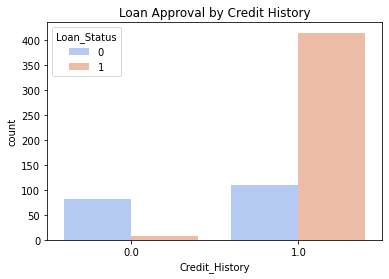

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette="coolwarm")
plt.title("Loan Approval by Credit History")
plt.show()


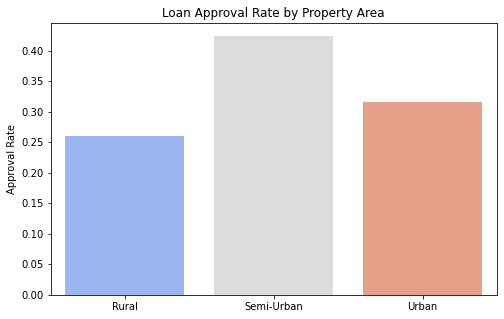

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Rural', 'Semi-Urban', 'Urban'], 
            y=[df.loc[df['Loan_Status'] == 1, 'Property_Area_Rural'].mean(),
               df.loc[df['Loan_Status'] == 1, 'Property_Area_Semiurban'].mean(),
               df.loc[df['Loan_Status'] == 1, 'Property_Area_Urban'].mean()], 
            palette="coolwarm")
plt.title("Loan Approval Rate by Property Area")
plt.ylabel("Approval Rate")
plt.show()


## Correlation Heat Map

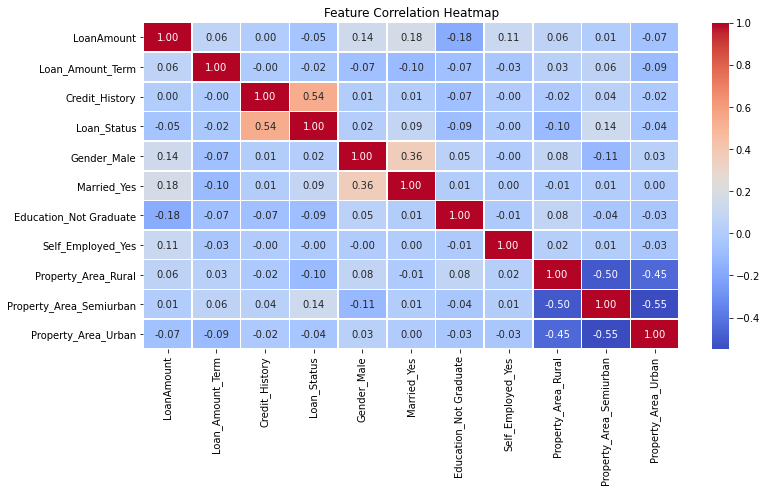

In [78]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Splitting The Data

In [79]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])  # Drop target variable
y = df['Loan_Status']  # Target variable

# Split dataset into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Model Training

## Logistics Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7967479674796748

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.44      0.60        85
           1       0.77      0.99      0.86       161

    accuracy                           0.80       246
   macro avg       0.86      0.71      0.73       246
weighted avg       0.83      0.80      0.77       246



c:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7357723577235772


## Gradient Boost

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [109]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.47      0.61        85
           1       0.77      0.96      0.86       161

    accuracy                           0.79       246
   macro avg       0.81      0.71      0.73       246
weighted avg       0.80      0.79      0.77       246



# Model Performance & Comparison

In [110]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))



Logistic Regression Accuracy: 0.7967479674796748
Random Forest Accuracy: 0.7357723577235772
Gradient Boosting Accuracy: 0.7886178861788617


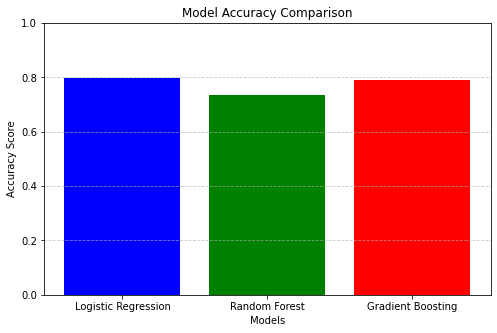

Confusion Matrix - Logistic Regression:
[[ 37  48]
 [  2 159]]

Confusion Matrix - Random Forest:
[[ 47  38]
 [ 27 134]]

Confusion Matrix - Gradient Boosting:
[[ 40  45]
 [  7 154]]



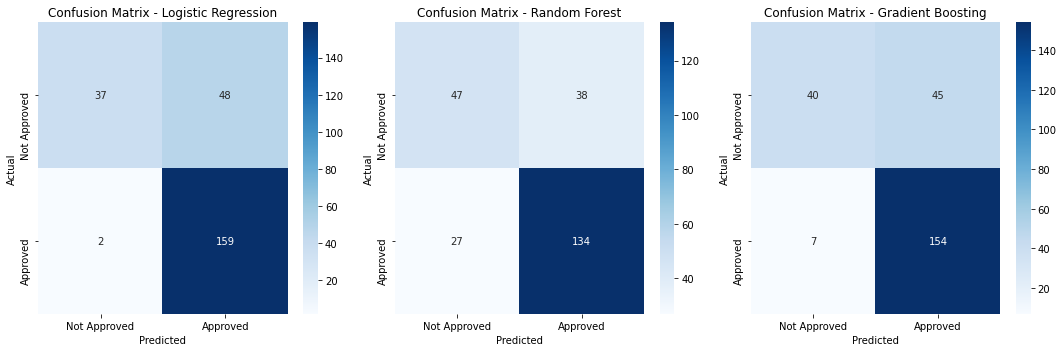

Confusion Matrices (Heatmaps shown above)


In [111]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# ... (Your model training and prediction code) ...

# 1. Store Accuracy Scores Correctly:  Make sure you have ONLY 3 scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
}

# 🔹 1. Bar Chart for Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["blue", "green", "red"])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔹 2. Confusion Matrices for All Models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

models = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
predictions = [y_pred, y_pred_rf, y_pred_gb]

for i, (model, y_pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix values as numbers
    print(f"Confusion Matrix - {model}:\n{cm}\n")

    # Plotting the heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")


plt.tight_layout()
plt.show()

print("Confusion Matrices (Heatmaps shown above)")

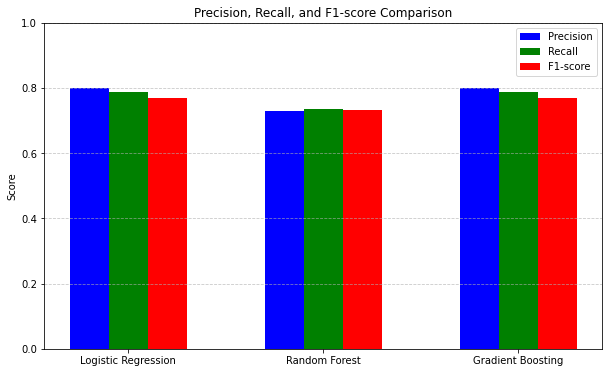

Model Performance:

Logistic Regression:
  Precision: 0.801
  Recall:    0.789
  F1-score:  0.769

Random Forest:
  Precision: 0.729
  Recall:    0.736
  F1-score:  0.731

Gradient Boosting:
  Precision: 0.801
  Recall:    0.789
  F1-score:  0.769

Model Performance (Alternative Format):
Logistic Regression  Precision: 0.801, Recall: 0.789, F1-score: 0.769
Random Forest        Precision: 0.729, Recall: 0.736, F1-score: 0.731
Gradient Boosting    Precision: 0.801, Recall: 0.789, F1-score: 0.769


In [112]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Compute precision, recall, F1-score for each model
models = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
predictions = [y_pred, y_pred_rf, y_pred_gb]  # Assuming these are your predictions
y_test = y_test # Assuming y_test contains the true labels

precision_scores = []
recall_scores = []
f1_scores = []

for y_pred in predictions:
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report["weighted avg"]["precision"])
    recall_scores.append(report["weighted avg"]["recall"])
    f1_scores.append(report["weighted avg"]["f1-score"])

# Convert to NumPy array for plotting
metrics = np.array([precision_scores, recall_scores, f1_scores])

# 🔹 Bar Chart for Comparison
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2  # Width of bars
x = np.arange(len(models))  # X-axis positions

ax.bar(x - bar_width, precision_scores, width=bar_width, label="Precision", color="blue")
ax.bar(x, recall_scores, width=bar_width, label="Recall", color="green")
ax.bar(x + bar_width, f1_scores, width=bar_width, label="F1-score", color="red")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Score")
ax.set_title("Precision, Recall, and F1-score Comparison")
ax.legend()
ax.set_ylim(0, 1)  # Set y-axis from 0 to 1

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



# Print the scores in number format
print("Model Performance:")
for i, model_name in enumerate(models):
    print(f"\n{model_name}:")
    print(f"  Precision: {precision_scores[i]:.3f}")  # Format to 3 decimal places
    print(f"  Recall:    {recall_scores[i]:.3f}")
    print(f"  F1-score:  {f1_scores[i]:.3f}")


# Alternative way to print using a loop and f-strings for better formatting
print("\nModel Performance (Alternative Format):")
for i, model in enumerate(models):
    print(f"{model:<20} Precision: {precision_scores[i]:.3f}, Recall: {recall_scores[i]:.3f}, F1-score: {f1_scores[i]:.3f}")

Model Performance Metrics:
                          MAE       MSE  R-squared
Logistic Regression  0.211382  0.211382   0.065254
Random Forest        0.264228  0.264228  -0.168433
Gradient Boosting    0.211382  0.211382   0.065254


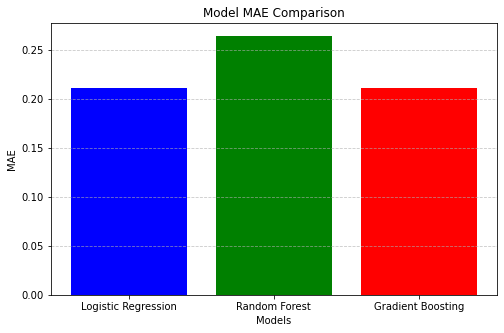

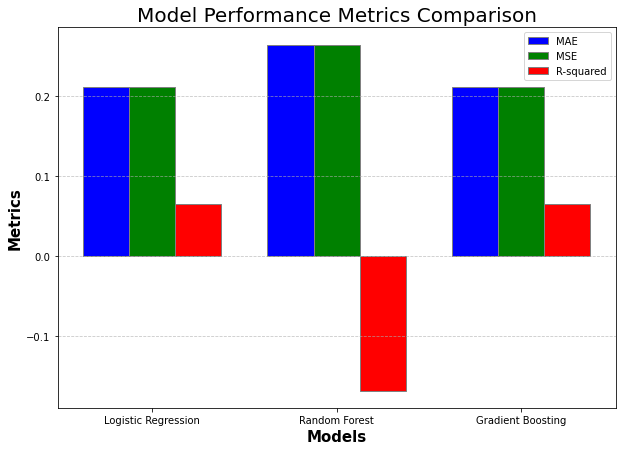

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store metrics
metrics = {
    "Logistic Regression": {},
    "Random Forest": {},
    "Gradient Boosting": {},
}

# Calculate and store metrics for each model
for model_name, y_true, y_pred in zip(
    ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    [y_test, y_test, y_test],  # True values are the same for all
    [y_pred, y_pred_rf, y_pred_gb],  # Predictions for each model
):
    metrics[model_name]["MAE"] = mean_absolute_error(y_true, y_pred)
    metrics[model_name]["MSE"] = mean_squared_error(y_true, y_pred)
    metrics[model_name]["R-squared"] = r2_score(y_true, y_pred)

# --- 1. Print Metrics Table ---
print("Model Performance Metrics:")
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')  # Create a pandas DataFrame
print(metrics_df)

# --- 2. Bar Chart for Metric Comparison (Example: MAE) ---
metric_to_plot = "MAE"  # Change this to "MSE" or "R-squared" to plot others

plt.figure(figsize=(8, 5))
plt.bar(
    metrics.keys(),
    [metrics[model][metric_to_plot] for model in metrics],
    color=["blue", "green", "red"],
)
plt.xlabel("Models")
plt.ylabel(metric_to_plot)
plt.title(f"Model {metric_to_plot} Comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- 3. (Optional) Bar chart for all metrics in one plot (More complex) ---
# Define the metrics and models
metrics_list = ["MAE", "MSE", "R-squared"]
models = list(metrics.keys())

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(10, 7))

# Plot bars for each metric
plt.bar(r1, [metrics[model]["MAE"] for model in models], color='blue', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, [metrics[model]["MSE"] for model in models], color='green', width=bar_width, edgecolor='grey', label='MSE')
plt.bar(r3, [metrics[model]["R-squared"] for model in models], color='red', width=bar_width, edgecolor='grey', label='R-squared')

# Add labels and title
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Metrics', fontweight='bold', fontsize=15)
plt.title('Model Performance Metrics Comparison', fontsize=20)
plt.legend()

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()